In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
el_2014 = pd.read_excel(r'C:\TIO4317_spring25_project\data\raw\ice_electric-2014.xlsx')

In [23]:
hub_names = el_2014["Price hub"].unique()
List_of_hubs_2014 = [el_2014[el_2014["Price hub"] == hub] for hub in hub_names]


In [ ]:
#For 2014: Tar ut dato og avg price fra hver hub og merger til en df med pris for de ulike hubene. 
df_date_price = List_of_hubs_2014[0][["Trade date",'Wtd avg price $/MWh']]
df_date_price = df_date_price.rename(columns={'Wtd avg price $/MWh': 'Price $/MWh \n'+hub_names[0]})

for i in range(1,len(List_of_hubs_2014)):
    df_date_price_n = List_of_hubs_2014[i][["Trade date",'Wtd avg price $/MWh']]
    df_date_price_n = df_date_price_n.rename(columns={'Wtd avg price $/MWh': 'Price $/MWh \n'+hub_names[i]})
    df_date_price = pd.merge(df_date_price,df_date_price_n,on="Trade date",how="outer")


In [ ]:
#Gjør det samme på nytt, men lager en liste med df for hvert år.

List_yearly_hub_prices = []
for i in range(14, 25):
    el = pd.read_excel(f'C:\\TIO4317_spring25_project\\data\\raw\\ice_electric-20{i}.xlsx')
    hub_names = el["Price hub"].unique()
    List_of_hubs = [el[el["Price hub"] == hub] for hub in hub_names]
    df_date_price = List_of_hubs[0][["Trade date",'Wtd avg price $/MWh']]
    df_date_price = df_date_price.rename(columns={'Wtd avg price $/MWh': 'Price $/MWh \n'+hub_names[0]})

    for i in range(1,len(List_of_hubs)):
        df_date_price_n = List_of_hubs[i][["Trade date",'Wtd avg price $/MWh']]
        df_date_price_n = df_date_price_n.rename(columns={'Wtd avg price $/MWh': 'Price $/MWh \n'+hub_names[i]})
        df_date_price = pd.merge(df_date_price,df_date_price_n,on="Trade date",how="outer") #outer for å få med alle datoer,selv om ikke nødvendigvis alle har verdi på samme dato. 
    List_yearly_hub_prices.append(df_date_price) 

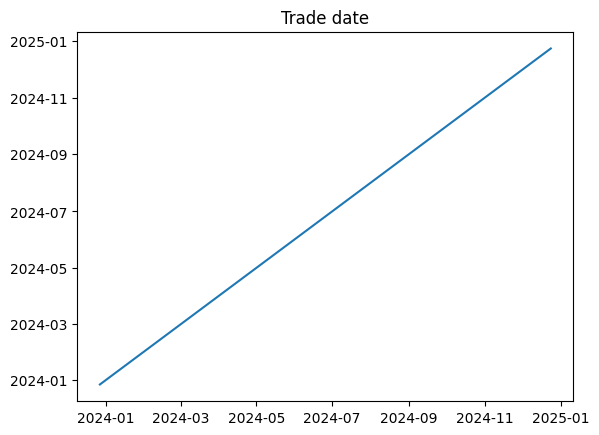

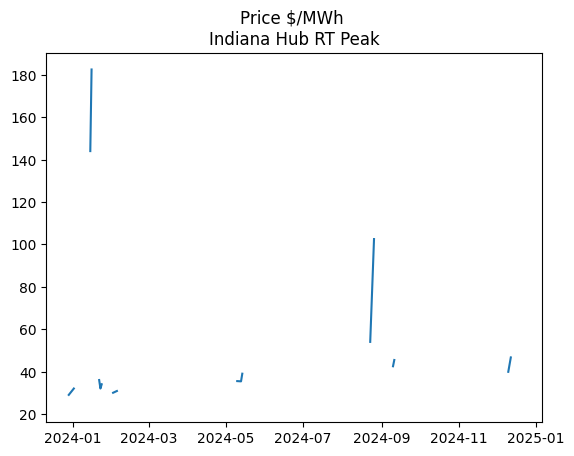

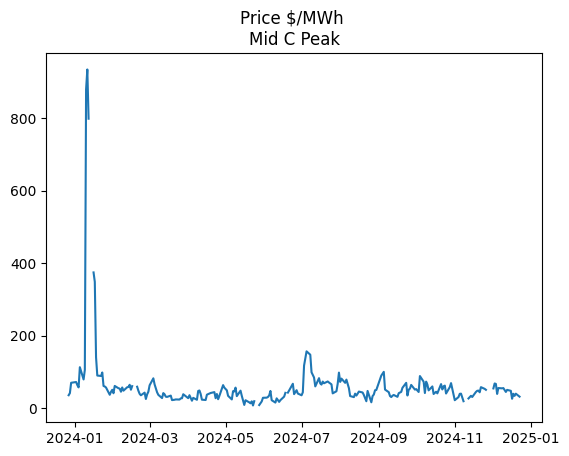

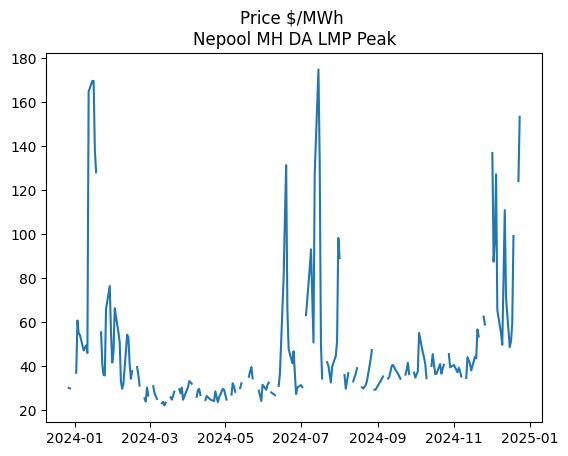

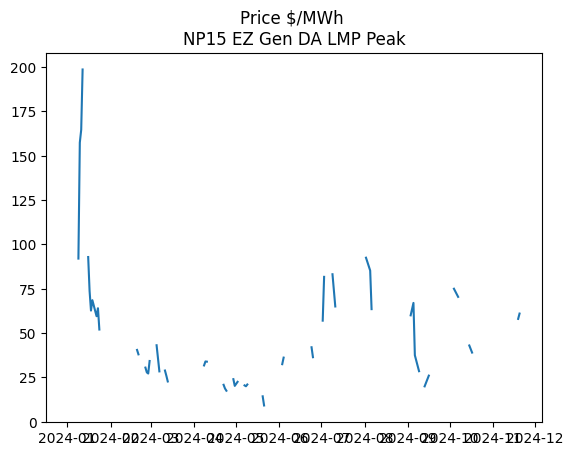

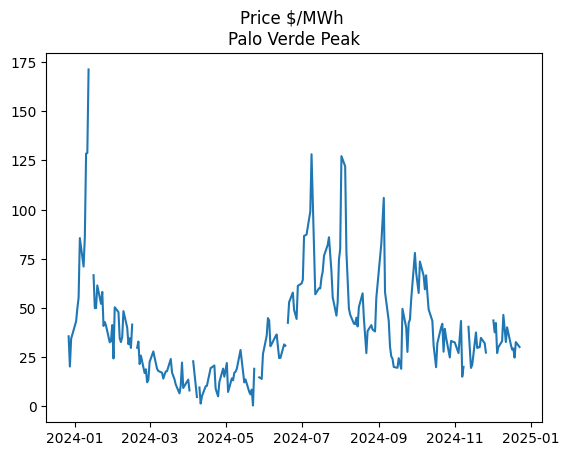

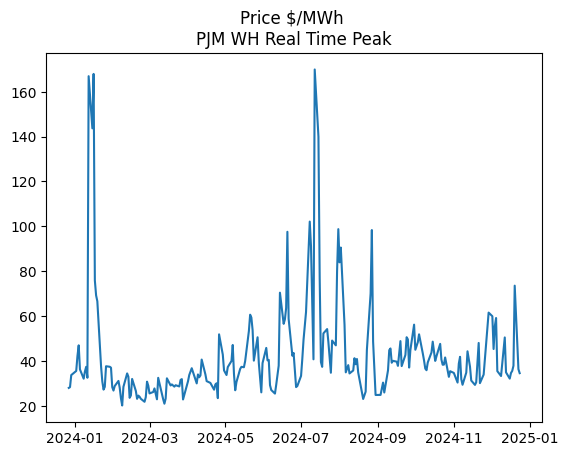

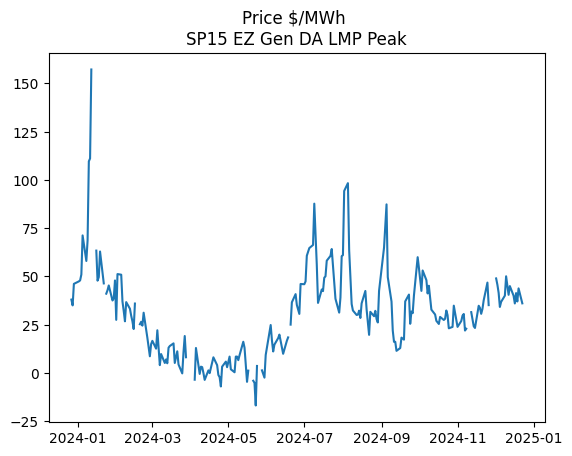

In [ ]:
el_2024 = List_yearly_hub_prices[10]
for column in el_2024.columns:
    plt.figure()
    plt.plot(el_2024['Trade date'],el_2024[column])
    plt.title(column)
    plt.show()

#Noen hubs har mange datoer uten verdier. 